# Titanic

In [20]:
import pandas as pd
import seaborn as sns

#### Reading the data

In [3]:
train = pd.read_csv('../data/train.csv')
data = pd.read_csv('../data/test.csv')

#### Exploratory Data Analysis

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

#### Data Cleaning

In [8]:
train = train.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [9]:
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [10]:
train.corr()['Survived'].sort_values()

Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [15]:
train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2], inplace=True)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481  0.543351 -0.077221 -0.035322  0.081629   
Pclass   -0.338481  1.000000 -0.131900 -0.369226  0.083081  0.018443   
Sex       0.543351 -0.131900  1.000000 -0.093254  0.114631  0.245489   
Age      -0.077221 -0.369226 -0.093254  1.000000 -0.308247 -0.189119   
SibSp    -0.035322  0.083081  0.114631 -0.308247  1.000000  0.414838   
Parch     0.081629  0.018443  0.245489 -0.189119  0.414838  1.000000   
Fare      0.257307 -0.549500  0.182333  0.096067  0.159651  0.216225   
Embarked  0.108669  0.043835  0.118593  0.012186 -0.060606 -0.079320   

              Fare  Embarked  
Survived  0.257307  0.108669  
Pclass   -0.549500  0.043835  
Sex       0.182333  0.118593  
Age       0.096067  0.012186  
SibSp     0.159651 -0.060606  
Parch     0.216225 -0.079320  
Fare      1.000000  0.063462  
Embarked  0.063462  1.000000  
AxesSubplot(0.125,0.125;0.62x0.755)


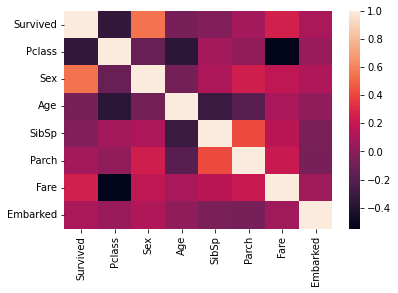

In [17]:
# check correlation between features
ax = sns.heatmap(train.corr())
print(train.corr())
print(ax)

In [18]:
# Normalize data
normal_train = (train - train.min()) / (train.max() - train.min())

In [19]:
# Determining the number of missing data
normal_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [22]:
# Simply removing the two Embarked rows
normal_train.dropna(subset = ["Embarked"], inplace=True)

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression